### Task 1

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [25]:
boston = load_boston()

In [26]:
data = boston.data
feature_names = boston.feature_names
target = boston.target


In [27]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['Price'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)


In [29]:
scaler = StandardScaler()


In [30]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [31]:
X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)

In [32]:
tsne = TSNE(n_components=2, learning_rate=250.0, random_state=42)

In [33]:
X_train_tsne = tsne.fit_transform(X_train_scale)

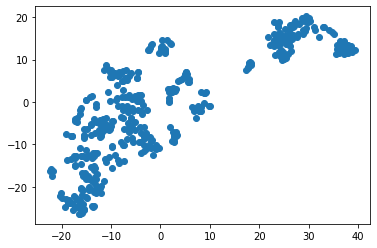

In [34]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Task2 

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [72]:
X_train_clustered = kmeans.fit_predict(X_train_scale)


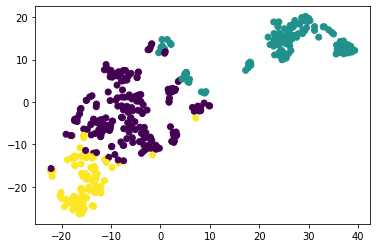

In [81]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c =  X_train_clustered)

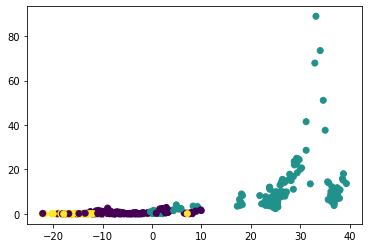

In [59]:
plt.scatter(X_train_tsne[:, 0], X_train["CRIM"], c =  X_train_clustered)

In [39]:
crim = pd.Series(X_train['CRIM'].values)

price = pd.Series(y_train['Price'].values)

#cluster = pd.Series(X_train_clustered['Cluster'].values)


In [40]:
overall = pd.DataFrame(list(zip(crim, price, X_train_clustered ))  , columns = ['Crime', "Price", "Cluster"])

In [41]:
#overall = pd.DataFrame(list(zip(crim, price, cluster ))  , columns = ['Crime', "Price", "Cluster"])

In [42]:
overall

,Crime,Price,Cluster
0,15.02340,12.0,1
1,0.62739,19.9,0
2,0.03466,19.4,2
3,7.05042,13.4,1
4,0.72580,18.2,0
...,...,...,...
399,0.17120,19.5,0
400,0.29916,21.1,0
401,0.01501,24.5,2
402,11.16040,13.4,1


In [43]:
for i in range(0, 3):
    a = overall[overall["Cluster"]==i]["Crime"].mean()
    print("Среднее значение преступности в кластере ", i, "равно ", round(a, 2))
    
    a = overall[overall["Cluster"]==i]["Price"].mean()
    print("Средняя стоимость дома в кластере ", i, "равно ", round(a, 2), "\n")
    

Среднее значение преступности в кластере  0 равно  0.42
Средняя стоимость дома в кластере  0 равно  24.96 

Среднее значение преступности в кластере  1 равно  10.8
Средняя стоимость дома в кластере  1 равно  16.17 

Среднее значение преступности в кластере  2 равно  0.07
Средняя стоимость дома в кластере  2 равно  27.79 



### Task 3

In [44]:
X_test_clustered_2 = kmeans.fit_predict(X_test_scale)

In [45]:
X_test_tsne = tsne.fit_transform(X_test_scale)

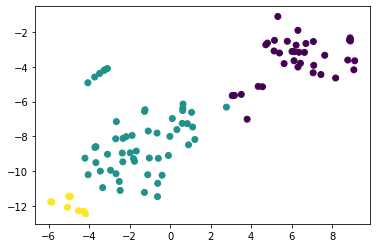

In [47]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c =  X_test_clustered_2)

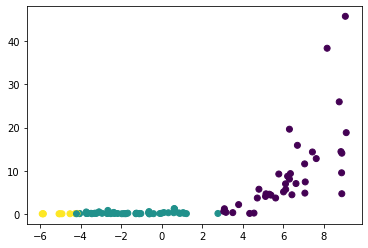

In [88]:
plt.scatter(X_test_tsne[:, 0], X_test["CRIM"], c =  X_test_clustered_2)

In [52]:
crim = pd.Series(X_test['CRIM'].values)

price = pd.Series(y_test['Price'].values)

overall_2 = pd.DataFrame(list(zip(crim, price, X_test_clustered_2))  , columns = ['Crime', "Price", "Cluster"])

In [53]:
for i in range(0, 3):
    a = overall_2[overall_2["Cluster"]==i]["Crime"].mean()
    print("Среднее значение преступности в кластере ", i, "равно ", round(a, 2))
    
    a = overall_2[overall_2["Cluster"]==i]["Price"].mean()
    print("Средняя стоимость дома в кластере ", i, "равно ", round(a, 2), "\n")

Среднее значение преступности в кластере  0 равно  9.42
Средняя стоимость дома в кластере  0 равно  16.71 

Среднее значение преступности в кластере  1 равно  0.22
Средняя стоимость дома в кластере  1 равно  22.69 

Среднее значение преступности в кластере  2 равно  0.04
Средняя стоимость дома в кластере  2 равно  34.31 



## Как получилось, что в трейн/тесте обозначения кластеров (0, 1, 2) отличаются?  

В трейне кластер с максимальной преступность - 1. В тесте кластер с максимальной преступностью - 0. 

Ещё вопрос, как можно было объединить столбцы X_test['CRIM'], y_test['Price'], X_test_clustered в одну таблицу без предварительного перевода их в series. 